### Data Analysis Interview Challenge ###

#### Part 1 ‑ Exploratory data analysis

logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [161]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# Load the Login json in the dataframe
df_login = pd.read_json('logins.json')
df_login.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [163]:
df_login['login_time'].min()

Timestamp('1970-01-01 20:12:16')

In [164]:
df_login['login_time'].max()

Timestamp('1970-04-13 18:57:38')

In [165]:
# based on minimum login time and maximum login time create 15 min interval
df_15m_idx= pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
df_15m_idx

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:45:00', '1970-04-13 17:00:00',
               '1970-04-13 17:15:00', '1970-04-13 17:30:00',
               '1970-04-13 17:45:00', '1970-04-13 18:00:00',
               '1970-04-13 18:15:00', '1970-04-13 18:30:00',
               '1970-04-13 18:45:00', '1970-04-13 19:00:00'],
              dtype='datetime64[ns]', length=9789, freq='15T')

In [166]:
#x11= pd.to_datetime(df_login['login_time'])
#x11
import collections
df_login = df_login.sort_values('login_time')
df_login = df_login.reset_index(drop=True)
cuts = pd.cut(pd.to_datetime(df_login['login_time']), pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T'))
x12 = collections.Counter(cuts.dropna())
idx1 = {"{}".format(k.left):v for k,v in x12.items()}
val1 =np.array(["{}".format(v)  for k,v in x12.items()])
print(type(idx1))
df_15m_int = pd.DataFrame( list(idx1.items()))
df_15m_int.columns = ['login_time','Count']
df_15m_int.set_index('login_time',inplace=True)

<class 'dict'>


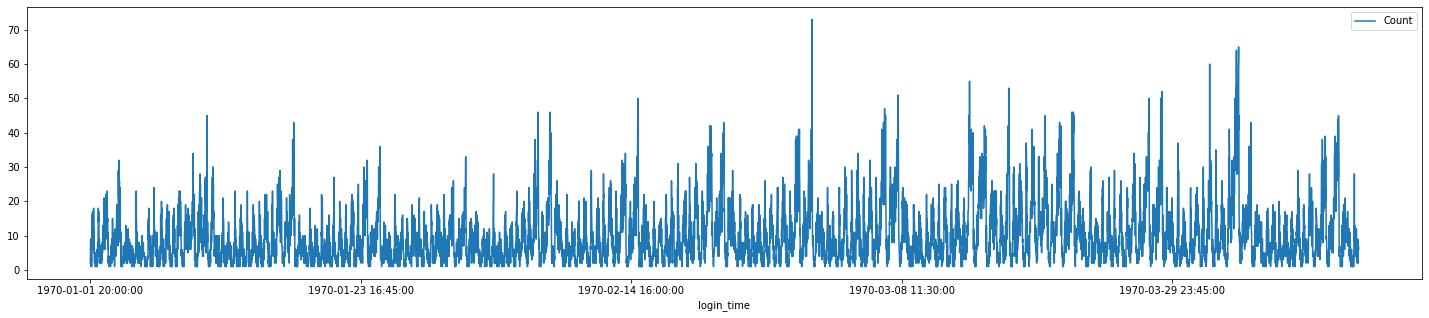

In [167]:
plt.rcParams["figure.figsize"] = (25,5)
df_15m_int.plot()
plt.show()

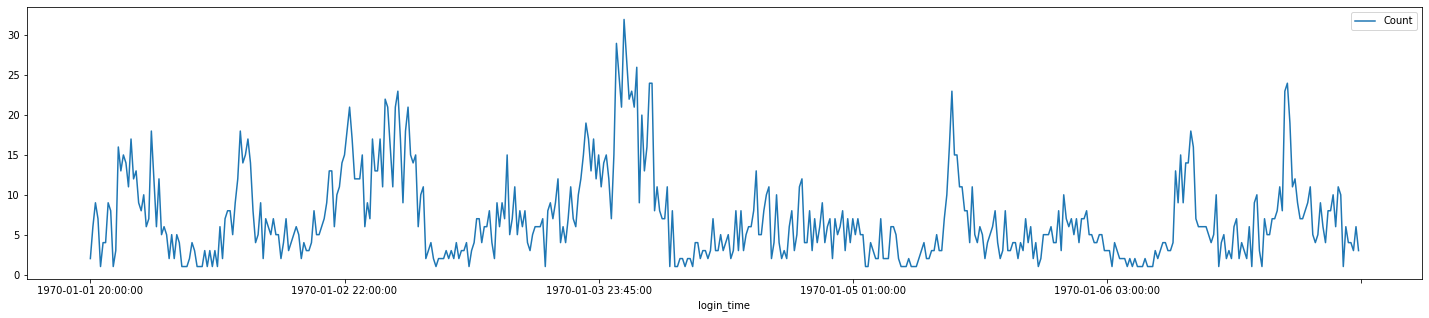

In [168]:
df_15m_int.head(500).plot()
plt.show()

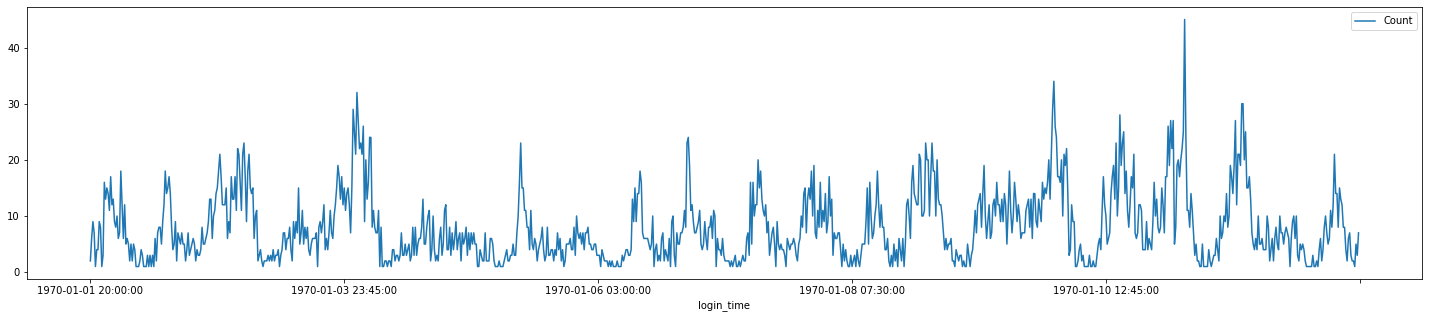

In [169]:
df_15m_int.head(1000).plot()
plt.show()

In [170]:
df_15m_int.index=pd.to_datetime(df_15m_int.index)
df_15m_int2=df_15m_int.copy()
df_15m_int2.index= df_15m_int2.index.day_name()

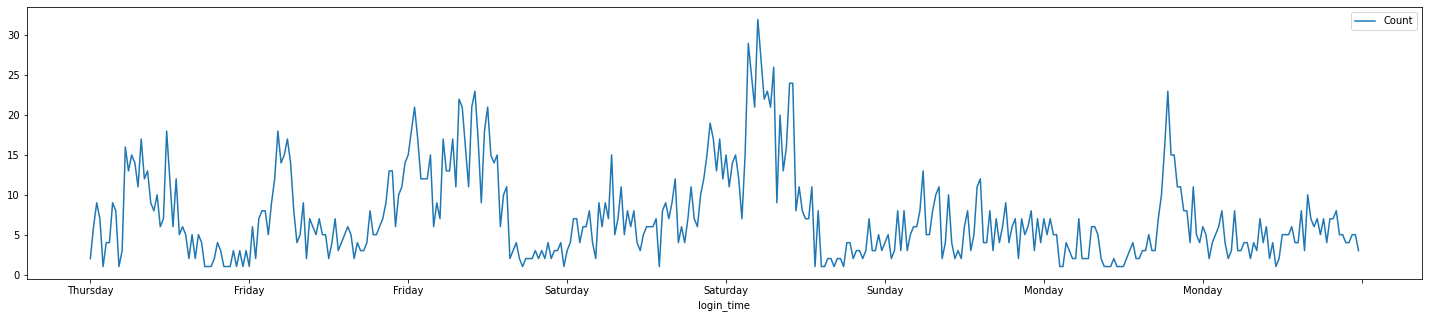

In [171]:
df_15m_int2.head(400).plot()
plt.show()

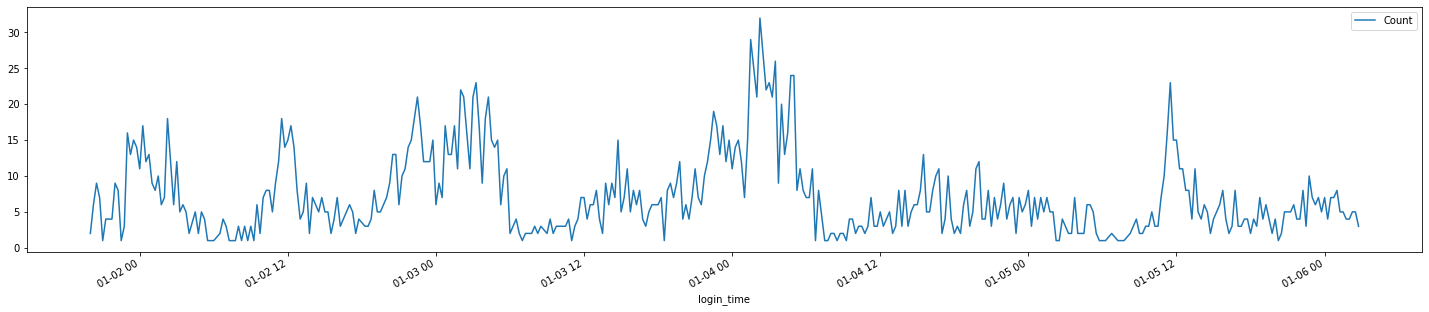

In [172]:
df_15m_int.head(400).plot()
plt.show()

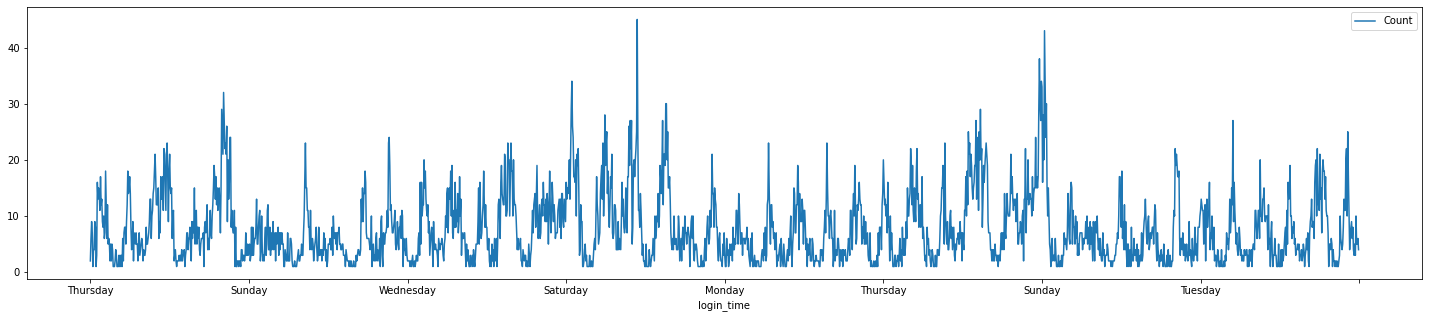

In [173]:
df_15m_int2.head(2000).plot()
plt.show()

#### Analysis

1. Trend seems to be consistent with pattern changing in 12 hrs interval
2. Peak is also seem happening over the weekend 

#### Part 1 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

** Answer ** Given that on weekdays Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. I would recommend for weekend engagement for drivers

Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

- how you will implement the experiment
- what statistical test(s) you will conduct to verify the significance of the observation
- how you would interpret the results and provide recommendations to the city operations team along with any caveats.

** How you will implement the experiment ** : I will implement the experiment with step wise approach. 
- First identify small pool of driver partner who would serve both the cities 
- Enable tracking for the identified driver partner to study a pattern on the activities
- Perform cost benefit analysis for revenue growth with cost of reimbursing toll 

** What statistical test(s) you will conduct to verify the significance of the observation ** 
Use a t-test to :
- compare the average number of trips back and forth across the city with number of trips within city for select group
- compare the average number of trip for select group with overall driver partner community

** how you would interpret the results and provide recommendations to the city operations team along with any caveats.**  Based on t-test result and cost benefit analysis i would infer and recommend if experiment can be really benefical in longer run

#### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge

- Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [174]:
df_rider_data = pd.read_json('ultimate_data_challenge.json')
df_rider_data.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [175]:
df_rider_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [176]:
df_rider_data_mod = df_rider_data
df_rider_data_mod['signup_date']= df_rider_data_mod['signup_date'].astype('datetime64[ns]')
df_rider_data_mod['last_trip_date']= df_rider_data_mod['last_trip_date'].astype('datetime64[ns]')
df_rider_data_mod.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [177]:
df_rider_data_mod['user_for_month']= ((df_rider_data_mod['last_trip_date'] -df_rider_data_mod['signup_date'])/np.timedelta64(1, 'M'))
df_rider_data_mod

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_for_month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,4.698248
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,3.154069
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.032855
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,5.585330
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1.544180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,4.303990
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0.032855
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,3.646892
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0.032855


In [178]:
df_rider_data_mod.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,user_for_month
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,3.048608
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,2.041268
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.887082
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,3.614037
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,4.928233
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,5.946734


In [179]:
df_rider_data_mod[df_rider_data_mod['avg_dist']==0]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_for_month
72,Astapor,1,2014-01-07,5.0,1.0,2014-01-08,iPhone,0.0,False,100.0,0.0,3.0,0.032855
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.0,5.0,0.032855
188,Winterfell,1,2014-01-11,NaN,1.0,2014-01-14,Android,0.0,False,100.0,0.0,5.0,0.098565
356,Winterfell,1,2014-01-15,4.0,1.0,2014-01-16,Android,0.0,False,100.0,0.0,5.0,0.032855
479,Winterfell,1,2014-01-24,5.0,1.0,2014-01-25,iPhone,0.0,False,0.0,0.0,5.0,0.032855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47929,Winterfell,0,2014-01-07,4.0,1.0,2014-03-14,iPhone,0.0,False,100.0,0.0,5.0,2.168422
48283,Winterfell,0,2014-01-18,NaN,1.0,2014-03-08,Android,0.0,False,0.0,0.0,5.0,1.609889
49464,Astapor,0,2014-01-03,5.0,1.0,2014-04-28,iPhone,0.0,False,100.0,0.0,5.0,3.778312
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.0,5.0,0.229984


In [180]:
def is_active(row):
    if row['user_for_month'] > 1 :
        return 'Y'
    else :
        return 'N'

df_rider_data_mod['is_active'] = df_rider_data_mod.apply (lambda row: is_active(row), axis=1) 

In [181]:
df_rider_data_mod

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_for_month,is_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,4.698248,Y
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,3.154069,Y
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.032855,N
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,5.585330,Y
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1.544180,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,4.303990,Y
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0.032855,N
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,3.646892,Y
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0.032855,N


In [182]:
df_rider_data_mod.is_active.value_counts()

Y    36973
N    13027
Name: is_active, dtype: int64

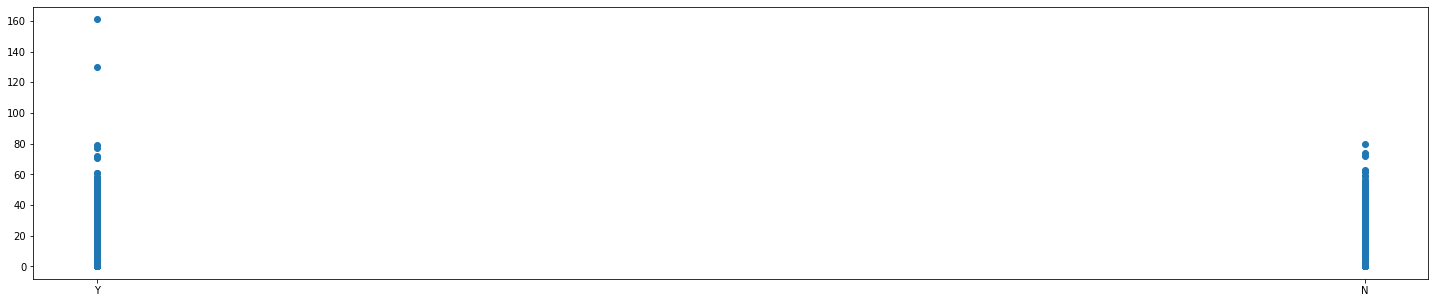

In [183]:
plt.scatter (df_rider_data_mod['is_active'],df_rider_data_mod['avg_dist'] )
plt.show()

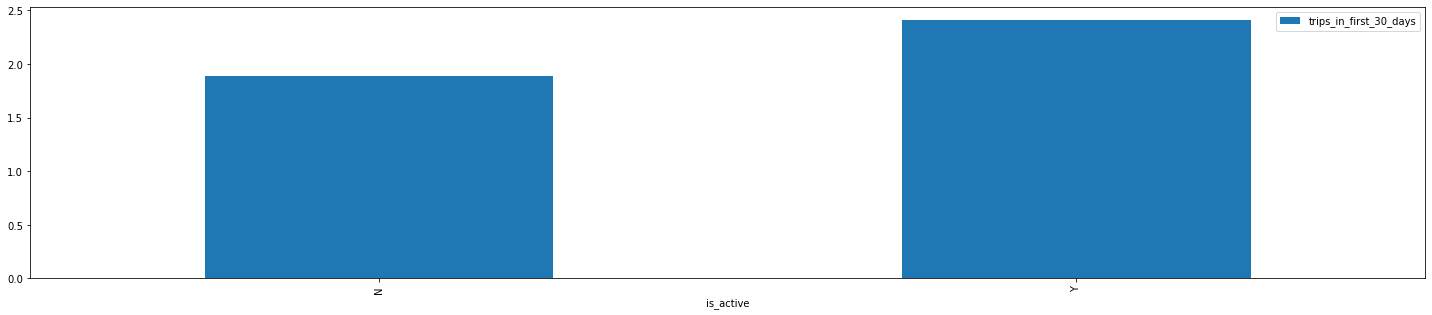

In [184]:
df_gby_ai_trip30_avg = df_rider_data_mod[['trips_in_first_30_days','is_active']].groupby('is_active').mean()
df_gby_ai_trip30_avg.plot.bar()
plt.show()

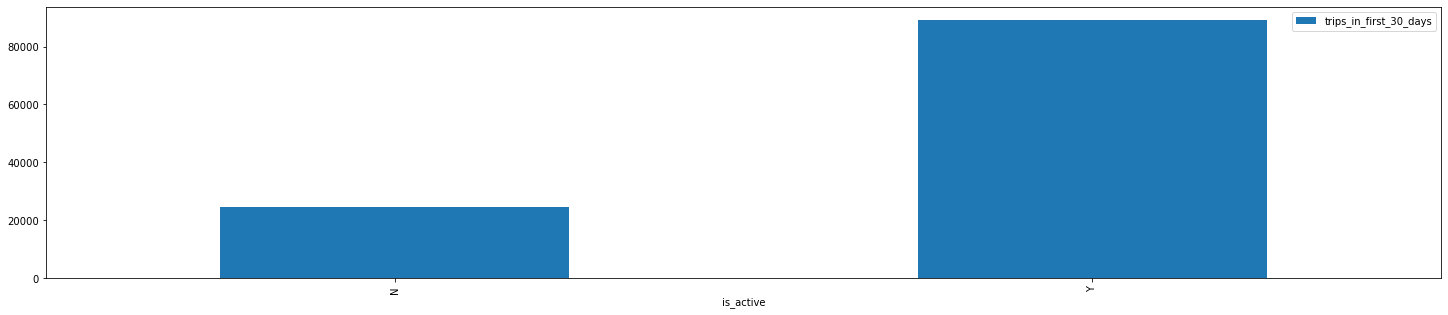

In [185]:
df_gby_ai_trip30_sum = df_rider_data_mod[['trips_in_first_30_days','is_active']].groupby('is_active').sum()
df_gby_ai_trip30_sum.plot.bar()
plt.show()

In [186]:
def single_trip_user(row):
    if row['trips_in_first_30_days'] == 1 :
        return 'Y'
    else :
        return 'N'

df_rider_data_mod['one_trip_first_30_days'] = df_rider_data_mod.apply (lambda row: single_trip_user(row), axis=1) 
df_gby_i_one_trip_sum = df_rider_data_mod[['trips_in_first_30_days','one_trip_first_30_days']][df_rider_data_mod['is_active']=='N'].groupby('one_trip_first_30_days').sum()
df_gby_i_one_trip_sum

,trips_in_first_30_days
one_trip_first_30_days,
N,16784
Y,7814


In [187]:
df_gby_i_one_trip_avg = df_rider_data_mod[['avg_dist','one_trip_first_30_days']][df_rider_data_mod['is_active']=='N'].groupby('one_trip_first_30_days').mean()
df_gby_i_one_trip_avg

,avg_dist
one_trip_first_30_days,
N,5.340811
Y,7.499299


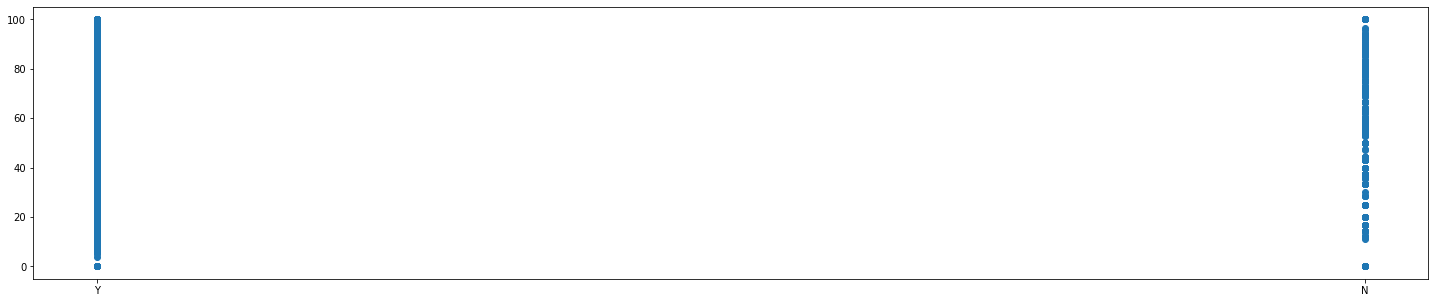

In [188]:
plt.scatter (df_rider_data_mod['is_active'],df_rider_data_mod['weekday_pct'] )
plt.show()

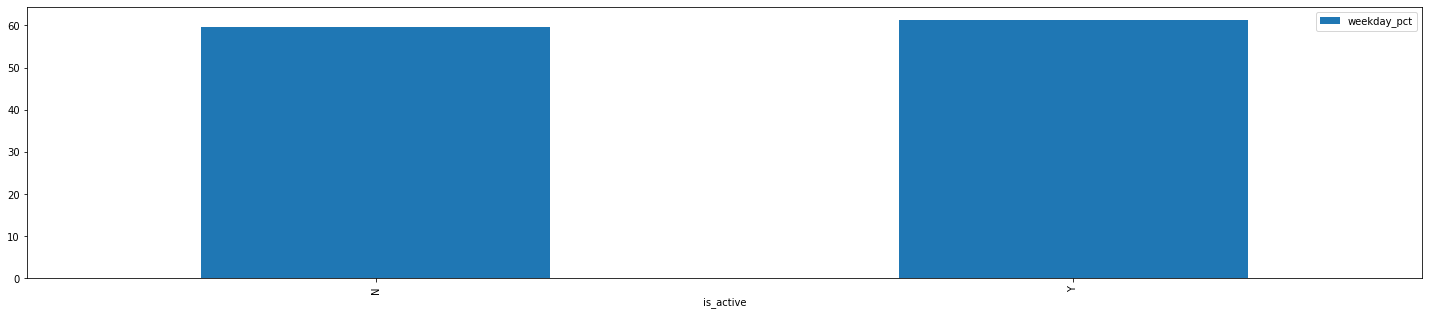

In [189]:
df_gby_ai_weekday_avg = df_rider_data_mod[['weekday_pct','is_active']].groupby('is_active').mean()
df_gby_ai_weekday_avg.plot.bar()
plt.show()

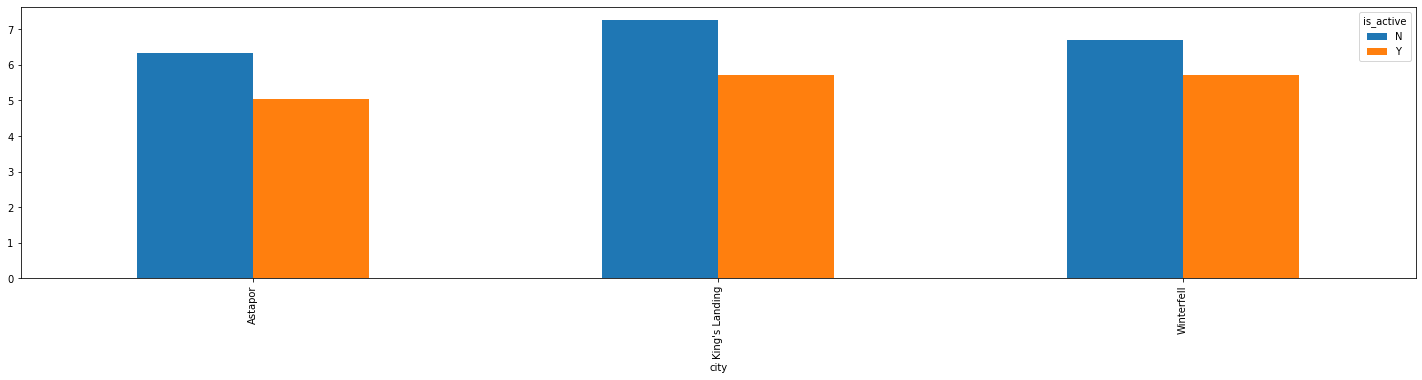

In [190]:
df_gby_city_avg_dist = df_rider_data_mod[['city','avg_dist','is_active']].groupby(['city','is_active']).mean().reset_index()
df_piv_city_avg_dist = df_gby_city_avg_dist[['city','avg_dist','is_active']].pivot(index='city',columns='is_active',values='avg_dist')
df_piv_city_avg_dist.plot(kind='bar')
plt.show()

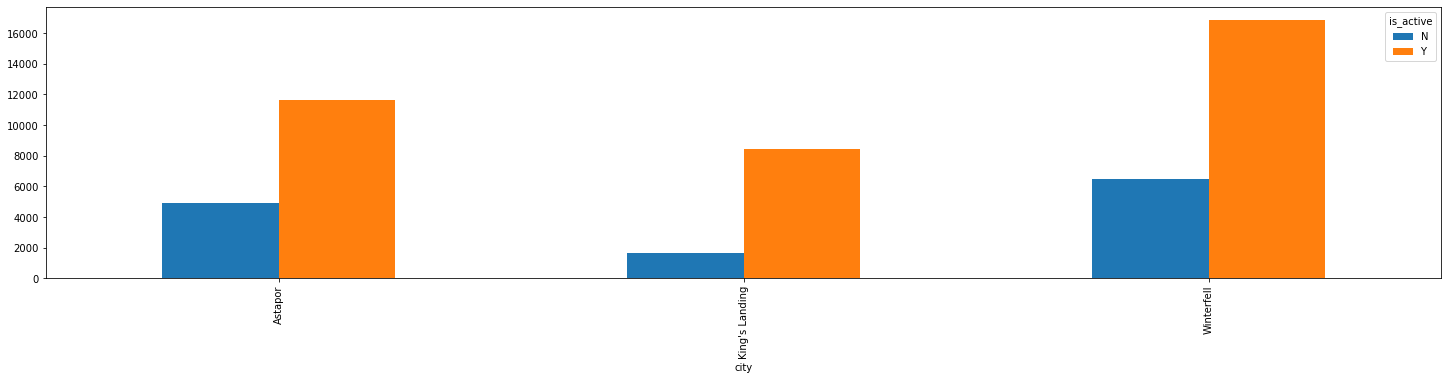

In [191]:
df_gby_city_ai_count = df_rider_data_mod[['city','is_active','signup_date']].groupby(['city','is_active']).count().reset_index()
df_gby_city_ai_count.rename(columns={'signup_date':'count'},inplace=True)
df_piv_city_ai = df_gby_city_ai_count.pivot(index='city',columns='is_active',values='count')
df_piv_city_ai.plot(kind='bar')
plt.show()

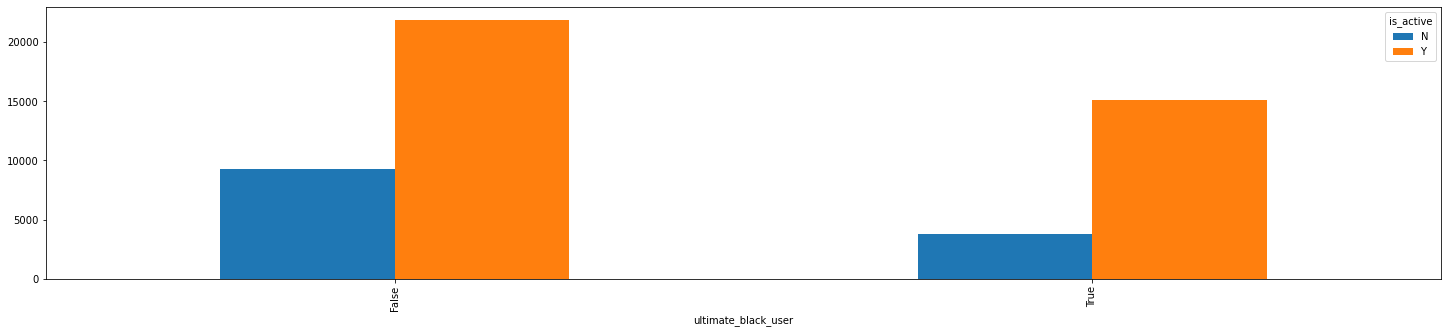

In [192]:
df_gby_ub_ai_count = df_rider_data_mod[['ultimate_black_user','is_active','signup_date']].groupby(['ultimate_black_user','is_active']).count().reset_index()
df_gby_ub_ai_count.rename(columns={'signup_date':'count'},inplace=True)
df_piv_ub_ai = df_gby_ub_ai_count.pivot(index='ultimate_black_user',columns='is_active',values='count')
df_piv_ub_ai.plot(kind='bar')
plt.show()

In [193]:
ub_ai_ct = pd.crosstab(index=df_rider_data_mod["is_active"],columns=df_rider_data_mod["ultimate_black_user"],margins=True)   
ub_ai_ct.columns = ["Not Ultimate Black","Ultimate Black","rowtotal"]
ub_ai_ct.index= ["InActive","Active","coltotal"]
ub_ai_ct

,Not Ultimate Black,Ultimate Black,rowtotal
InActive,9258,3769,13027
Active,21888,15085,36973
coltotal,31146,18854,50000


In [194]:
phone_ai_ct = pd.crosstab(index=df_rider_data_mod["is_active"], 
                            columns=df_rider_data_mod["phone"],
                             margins=True)   # Include row and column totals

phone_ai_ct.columns = ["Android","iPhone","rowtotal"]
phone_ai_ct.index= ["InActive","Active","coltotal"]
phone_ai_ct

,Android,iPhone,rowtotal
InActive,5054,7811,12865
Active,9968,26771,36739
coltotal,15022,34582,49604


####  Predictive model ####

In [195]:
# Find number of null values in data frame
df_rider_data_mod.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
user_for_month               0
is_active                    0
one_trip_first_30_days       0
dtype: int64

**Clean data**

In [196]:
df_rider_data_pred_mod=df_rider_data_mod
df_rider_data_pred_mod.drop(df_rider_data_pred_mod[df_rider_data_pred_mod.phone.isna()==True].index,axis=0)
df_rider_data_pred_mod['avg_rating_by_driver'] = df_rider_data_mod['avg_rating_by_driver'].mean()
df_rider_data_pred_mod['avg_rating_of_driver'] = df_rider_data_mod['avg_rating_of_driver'].mean()
df_rider_data_pred_mod.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,user_for_month
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,2.278200,4.601559e+00,1.074764,8.849536,60.926084,5.796827,4.778158e+00,3.048608
std,3.792684,8.473307e-13,0.222336,19.958811,37.081503,5.707357,3.250766e-12,2.041268
min,0.000000,4.601559e+00,1.000000,0.000000,0.000000,0.000000,4.778158e+00,0.000000
25%,0.000000,4.601559e+00,1.000000,0.000000,33.300000,2.420000,4.778158e+00,0.887082
50%,1.000000,4.601559e+00,1.000000,0.000000,66.700000,3.880000,4.778158e+00,3.614037
75%,3.000000,4.601559e+00,1.050000,8.600000,100.000000,6.940000,4.778158e+00,4.928233
max,125.000000,4.601559e+00,8.000000,100.000000,100.000000,160.960000,4.778158e+00,5.946734


In [197]:
#transforming features 
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le1.fit(['Astapor',"King's Landing",'Winterfell'])
le2 = preprocessing.LabelEncoder()
le2.fit(['iPhone','Android'])
le3 = preprocessing.LabelEncoder()
le3.fit(['Y','N'])

LabelEncoder()

In [198]:
df_rider_data_pred_mod = df_rider_data_pred_mod.dropna()
df_rider_data_pred_mod.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
user_for_month            0
is_active                 0
one_trip_first_30_days    0
dtype: int64

In [199]:
city_en = le1.transform(df_rider_data_pred_mod['city']) 
phone_en = le2.transform(df_rider_data_pred_mod['phone'])
is_active_en = le3.transform(df_rider_data_pred_mod['is_active'])

In [200]:
df_city = pd.DataFrame(city_en,columns = ['city_en']) 
df_phone = pd.DataFrame(phone_en, columns = ['phone_en'])
df_is_active = pd.DataFrame(is_active_en, columns = ['is_active_en'])
df_ub = pd.DataFrame((df_rider_data_pred_mod['ultimate_black_user'] == True).astype(int))
df_ub.rename(columns={'ultimate_black_user':'ub_en'}, inplace=True)
df_city.reset_index(drop=True, inplace=True)
df_phone.reset_index(drop=True, inplace=True)
df_is_active.reset_index(drop=True, inplace=True)
df_ub.reset_index(drop=True, inplace=True)
df_rider_data_pred_mod.reset_index(drop=True, inplace=True)
df_rider_data_pred_mod_en = pd.concat([df_rider_data_pred_mod,df_city,df_phone,df_is_active,df_ub],axis =1 )

In [201]:
df_rider_data_pred_mod_en = df_rider_data_pred_mod_en[['trips_in_first_30_days','avg_rating_of_driver','avg_rating_by_driver','avg_dist','city_en','phone_en','ub_en','is_active_en']]

In [202]:
#Identify features and target
X = df_rider_data_pred_mod_en[['trips_in_first_30_days','avg_rating_of_driver','avg_rating_by_driver','avg_dist','city_en','phone_en','ub_en']]
y = df_rider_data_pred_mod_en['is_active_en']

In [203]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [204]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [205]:
#build random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [206]:
rf.score(X_test,y_test)

0.7619191613748614

In [207]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.77531486 0.75100806 0.75907258 0.765625   0.75756048]
Mean Cross Validated Score: 0.760910101974486


In [208]:
# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1275 1230]
 [1132 6284]]
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      2505
           1       0.84      0.85      0.84      7416

    accuracy                           0.76      9921
   macro avg       0.68      0.68      0.68      9921
weighted avg       0.76      0.76      0.76      9921



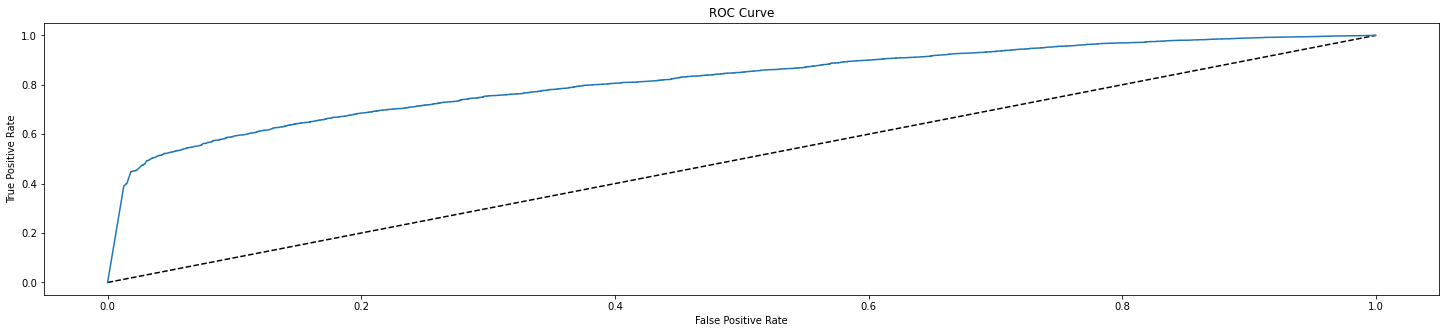

In [209]:
from sklearn.metrics import roc_curve

y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [210]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred_prob = rf.predict_proba(X_test)[:,1]
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.817133613032834


In [211]:
cv_auc = cross_val_score(rf, X, y, cv = 5,scoring = 'roc_auc')
print("AUC scores computed using 5-fold CV: {}".format(cv_auc))

AUC scores computed using 5-fold CV: [0.81929012 0.82577811 0.81504233 0.81617861 0.81890919]


Accuracy with RandomForest classifier comes to 76%. We can try to improve model performance using some hyperparameter tuning

In [214]:
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [215]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [216]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [218]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [219]:
from sklearn.metrics import accuracy_score
rfc1_pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,rfc1_pred))

Accuracy for Random Forest on CV data:  0.8110069549440581


Feature ranking:
1. feature 0 (0.711498)
2. feature 3 (0.175474)
3. feature 6 (0.042648)
4. feature 5 (0.037742)
5. feature 4 (0.032639)
6. feature 2 (0.000000)
7. feature 1 (0.000000)


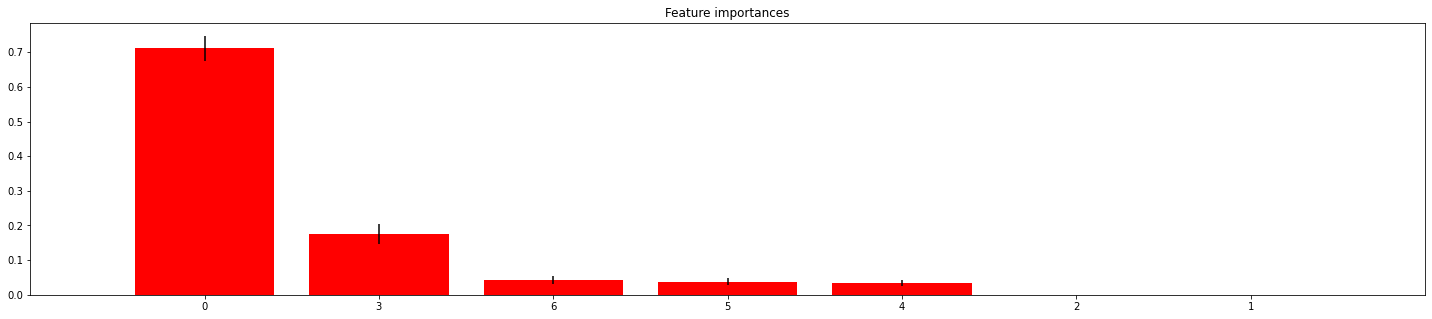

In [223]:
importances = rfc1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [228]:
df_score = pd.DataFrame(zip(list(df_rider_data_pred_mod_en.columns),rfc1.feature_importances_))
df_score

,0,1
0,trips_in_first_30_days,0.711498
1,avg_rating_of_driver,0.000000
2,avg_rating_by_driver,0.000000
3,avg_dist,0.175474
4,city_en,0.032639
5,phone_en,0.037742
6,ub_en,0.042648


#### Conclusion ####

Objective of this model was to determine which user will remain active. I had used RandomForest classifier and got **76%** accuracy and with hyperparameter tuning accuracy got improved to **81%**

Interpreting model output **trips_in_first_30_days** and **avg_dist** were the most important feature. What this means users who
1. takes the trip in first month after signing up
2. would commute locally and make smaller trips 

These are users who would most likely remain active customer. 
There should be some kind of promotions which should come out for these kinds of users. 